In [22]:
import pandas as pd
import numpy as np
from os import environ
environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import re
from sklearn.metrics import roc_curve, accuracy_score, auc, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train_clean.csv')

In [3]:
test = pd.read_csv('data/test_clean.csv')

In [4]:
#Don't include "Unnamed:0" column. Separate features and outcome.

X_train = train.iloc[:, 1:5001]
X_test = test.iloc[:, 1:5001]
y_train = train['rating_class']
y_test = test['rating_class']

In [5]:
#obtain shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160398, 5000)
(53471, 5000)
(160398,)
(53471,)


In [6]:
# set number of features/dims
ndim = 5000

In [7]:
print(y_train.shape)
print(y_test.shape)

(160398,)
(53471,)


In [8]:
def build_model():
  
    model = Sequential()

    #Start large and condense downwards
    model.add(Dense(128, activation='relu', input_dim=ndim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])
    model.summary()
    return model

def fit_model(model):
    #16 for speed/accuracy
    #model typically converges right around 11, past this can break the model
    model_hist = model.fit(X_train, y_train, batch_size = 16, epochs = 11)
    return model_hist 

In [9]:
# Build the model and fit to training data
model = build_model()
model_hist = fit_model(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1

In [10]:
#First label is probability of 0, second is probability of 1
train_prediction = model.predict(X_train)
train_prediction

array([[1.0000000e+00],
       [1.0000000e+00],
       [6.3778907e-06],
       ...,
       [1.9913068e-06],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [11]:
#Clean predictions for metrics 
train_predictions = []
for i in range(len(train_prediction)):
    if train_prediction[i] > 0.5:
        train_predictions.append(1)
    else:
        train_predictions.append(0)

In [12]:
#Report metrics
accuracy_train = (accuracy_score(y_train, train_predictions))
precision_train = (precision_score(y_train,train_predictions))
recall_train = (recall_score(y_train,train_predictions))
f1_train = (f1_score(y_train,train_predictions))

print("Train accuracy:", accuracy_train)
print("Train precision:", precision_train)
print("Train recall:", recall_train)
print("Train F1:", f1_train)

Train accuracy: 0.9986845222509009
Train precision: 0.998916941869962
Train recall: 0.9992096686824555
Train F1: 0.9990632838338771


In [13]:
#First label is probability of 0, second is probability of 1
test_prediction = model.predict(X_test)
test_prediction

array([[1.0000000e+00],
       [1.0000000e+00],
       [9.9999845e-01],
       ...,
       [1.0000000e+00],
       [1.5783310e-04],
       [1.0000000e+00]], dtype=float32)

In [14]:
#Clean predictions for metrics
test_predictions = []
for i in range(len(test_prediction)):
    if test_prediction[i] > 0.5:
        test_predictions.append(1)
    else:
        test_predictions.append(0)

In [15]:
#First label is probability of 0, second is probability of 1
accuracy_test = (accuracy_score(y_test, test_predictions))
precision_test = (precision_score(y_test, test_predictions))
recall_test = (recall_score(y_test, test_predictions))
f1_test = (f1_score(y_test, test_predictions))

print("Test accuracy:", accuracy_test)
print("Test precision:", precision_test)
print("Test recall:", recall_test)
print("Test F1:", f1_test)

Test accuracy: 0.9176375979502908
Test precision: 0.9369993103082391
Test recall: 0.9456789462411651
Test F1: 0.9413191205862758


Text(0.5, 0, 'False Positive Rate')

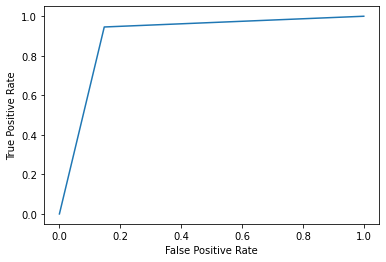

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions, pos_label=1)
area_under_curve = auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [25]:
print("Area Under Curve: ", area_under_curve)

Area Under Curve:  0.8991686498685197
